#CI7250 Machine Learning and Artificial Intelligence

##Assignment 1


---


Group 11 Members:
*    Erika Coke - K2112049
*    Ladan Saeidi - K2145352
*    Çiğdem Şahin - K2058962

#**PART II** – Application: Clustering (Group Submission)

## Importing the Dataset
---


In [157]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# Loading data
data =  datasets.load_breast_cancer()

In [159]:
# Selecting the X and y data from the dataset
X = data.data
y = data.target 

print('X:\n',X)
print('y:\n',y)

X:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 

## Pre-processing
---



### Feature Scaling
The dataset is unbalanced (i.e.some of the features have values in 1e-2, others are 1e+2), so we will apply feature scaling to ensure the larger features don't overshadown the smaller features when we conduct our testing methods [1].

In [160]:
from sklearn import preprocessing
X = data.data
y = data.target
# Generating the scaled dataset below
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


Now all of our data falls within the same order of magnitude.

### Principal Component Analysis (PCA)
---
As we learned in part 1, our dataset has 30 features. For some of the clustering methods, this is too many features. To improve speed, accuracy, and overall performance, we will apply PCA and reduce the number of features. The number of features used can vary depending on the model, but we will illustrate the use of PCA to maintain 95% of the variance in the dataset below. 

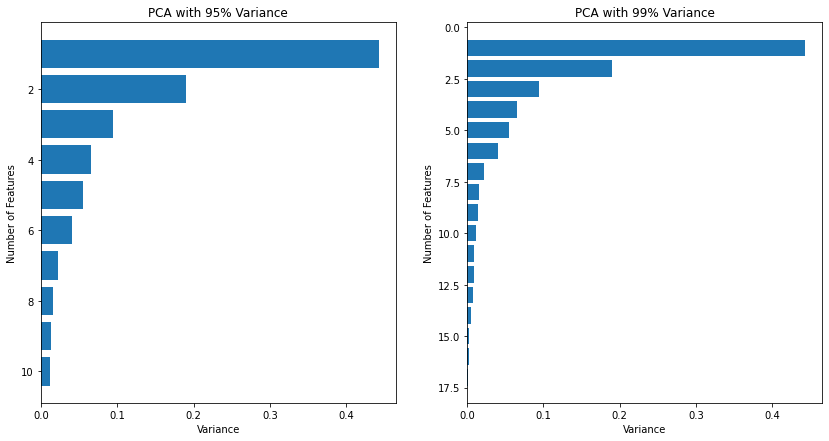



      Number of Features with 95% Variance:  10                Number of Features with 99% Variance:  17


In [161]:
# Importing PCA feature from scikit learn
from sklearn.decomposition import PCA

# We want to include 95% of the features in our PCA dataset
# We will perform PCA on the scaled dataset for increased accuracy
# .fit(X_scaled) -> trains the model on the X_scaled dataset
pca_95 = PCA(0.95).fit(X_scaled)

# Applying the dimensionality reduciton to X_Scaled (turning the data into an array)
X_pca95 = pca_95.transform(X_scaled)

# We will perform the same PCA analysis for 99% of the features and compare
# We will perform PCA on the scaled dataset for increased accuracy
# .fit(X_scaled) -> trains the model on the X_scaled dataset
pca_99 = PCA(0.99).fit(X_scaled)

# Applying the dimensionality reduciton to X_Scaled (turning the data into an array)
X_pca99 = pca_99.transform(X_scaled)

# Plotting the PCA Variances
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
# 95% variance
num_feat_95 = range(1,(pca_95.n_components_+1))
ax1.invert_yaxis()
ax1.barh(num_feat_95,pca_95.explained_variance_ratio_)
ax1.set_title('PCA with 95% Variance') 
ax1.set_ylabel('Number of Features')
ax1.set_xlabel('Variance')
# 99% variance 
ax2.invert_yaxis()
num_feat_99 = range(1,(pca_99.n_components_+1))
ax2.barh(num_feat_99,pca_99.explained_variance_ratio_)
ax2.set_title('PCA with 99% Variance')
ax2.set_ylabel('Number of Features')
ax2.set_xlabel('Variance')
plt.show()
print('\n')
print('      Number of Features with 95% Variance: ',pca_95.n_components_,'               Number of Features with 99% Variance: ',pca_99.n_components_,)



If we want to keep 95% of data variance, then PCA selects 10 features. If we choose to utilize 99% of data variance, then PCA jumps up to 17 features.

Now that we have conducted PCA analysis on our features, we need to understand the variance between these datasets. If we want to visualize our clusters using a scatterplot, we can only do so if first few features account for the majority of our variance. To get a better look at the variance of our features, we will use PCA's ```explained_variance_``` attribute.

In [162]:
# Finding numerical values for explained variance
# Explained Variance of 95% dataset
ExpVar_95 = pca_95.explained_variance_
print('95% PCA Explained Variance')
print(' Num Features    Variance')
count=1
for i in ExpVar_95:
  if count < 10:
    print('      %d             %d'%(count,i))
  else:
    print('      %d            %d'%(count,i))
  count+=1
# Explained Variance of 99% dataset
ExpVar_99 = pca_99.explained_variance_
print('--------------------------')
print('99% PCA Explained Variance')
print(' Num Features    Variance')
count=1
for i in ExpVar_99:
  if count < 10:
    print('      %d             %d'%(count,i))
  else:
    print('      %d            %d'%(count,i))
  count+=1

95% PCA Explained Variance
 Num Features    Variance
      1             13
      2             5
      3             2
      4             1
      5             1
      6             1
      7             0
      8             0
      9             0
      10            0
--------------------------
99% PCA Explained Variance
 Num Features    Variance
      1             13
      2             5
      3             2
      4             1
      5             1
      6             1
      7             0
      8             0
      9             0
      10            0
      11            0
      12            0
      13            0
      14            0
      15            0
      16            0
      17            0


After looking at the explained variance, the majority of the variance is in features 1 and 2 for both the 95% PCA transformation and the 99% PCA transformation. Because of this, we will create use the 95% PCA transformation data to plot our clusters as the breakdown is the same for both and 95% PCA has fewer features, resutling in faster computations.

### Testing Methods

####Internal Clustering Evaluation Metrics

Interal methods focus only on the results of the clustering model and can be used used when there is no ground truth. These methods make assumptions about the cluster structure. 

We will create a function that applies internal evaluation methods to determine the optimal number of k-clusters for the dataset. This way, we can quickly test each of our clustering methods to ensure accuracy. A summary of each testing metric is shown below.

* **Calinski-Harabasz Score:** Also known as the Variance Ratio Criterion, it is the ration of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters. Higher scores indicate better performances. [2] 
* **Davies-Bouldin Score:** Signifies the average similarity between clusters by comparing the distance between clustes with the size of the clusters. A lower score means the model has better separation between clusters. [2]
* **Silhouette Coefficient:** Defined for each sample and measures the closeness of points in the same cluster and the distance of points in different clusters. A higher score indicates a model with more defined clusters. [2]

Below we will import all of the testing metrics we will use throughout this project.

In [163]:
# Internal Testing Metrics
from sklearn.cluster import KMeans                    # Elbow Method
from sklearn.metrics import calinski_harabasz_score   # Calinski Harabasz Score
from sklearn.metrics import davies_bouldin_score      # Davies Bouldin Score
from sklearn.metrics import silhouette_score          # Silhouette Score

First, we will create a function that will create a dictionary of scores for each of our testing metrics.

In [164]:
# Finding the scoring metrics for K-clusters between 2 and 30
# Creating the the dictionary of scores
# clm -> the chosen clustering model
# X -> the data being used in the clustering model 
# num_samp -> the range of k-clusters being tested 
# To choose which metrics you want to exclude from testing, set the value to False

def k_finder(clm,X,num_samp,CH=True,DB=True,Sil=True):
  score = {'K-Value': [], 
            'Calinski-Harabasz Score':[],
            'Davies-Bouldin Score':[],
            'Silhouette Coefficient':[],
           }
  for i in range(0,num_samp):
    # Internal Scoring Metrics
    score['K-Value'].append(i+2)
    if CH == True:
      score['Calinski-Harabasz Score'].append(calinski_harabasz_score(X,clm[i]))
    if DB == True:
      score['Davies-Bouldin Score'].append(davies_bouldin_score(X,clm[i]))
    if Sil == True:
      score['Silhouette Coefficient'].append(silhouette_score(X,clm[i]))
  return score
  

Next we create a function to tell us the optimal k-value based on each scoring metric. This function will also generate plots if we choose to plot the results.

In [165]:
# Returns the optimal k-value and score for different testing methods
# The default mode of this function will plot the results unless plot=False 
def k_score_info(score,num_samp,plot=True):  
  # getting the number of non-empty keys
  count=0
  for i in score:
    if score[i] != []:
      count+=1

  # creating the plot size
  if plot==True:
    fig,axes = plt.subplots(count-1,1,figsize = (10,5))
    index=0
    font = {'color':  'darkblue',
            'weight': 'normal',
            'size': 14,
        }

  # printing the K-numbers, scores, and the plots
  ## Internal Methods
  # Calinski-Harabasz Score    
  count = 0
  if score['Calinski-Harabasz Score'] != []:
    for i in score['Calinski-Harabasz Score']:
      count += 1
      if i == max(score['Calinski-Harabasz Score']):
        k = score['K-Value'][count-1]
        chs = score['Calinski-Harabasz Score'][count-1]
        print('Calinski-Harabasz Score')
        print('   K-Value: ',score['K-Value'][count-1])
        print('   Score: ',round(score['Calinski-Harabasz Score'][count-1],3))
    if plot==True:
      axes[index].plot(score['K-Value'],score['Calinski-Harabasz Score'])
      axes[index].set_title('Calinski-Harabasz Score',fontdict=font)
      axes[index].plot(k, chs, marker="o", markersize=5, markerfacecolor="red")
      axes[index].set_xticks(np.arange(1,num_samp))
      index+=1
  # Davies-Bouldin Score
  count=0
  if score['Davies-Bouldin Score'] != []:
    for i in score['Davies-Bouldin Score']:
      count += 1
      if i == min(score['Davies-Bouldin Score']):
        k = score['K-Value'][count-1]
        dbs = score['Davies-Bouldin Score'][count-1]
        print('Davies-Bouldin Score')
        print('   K-Value: ',score['K-Value'][count-1])
        print('   Score: ',round(score['Davies-Bouldin Score'][count-1],3))
    if plot==True:
      axes[index].plot(score['K-Value'],score['Davies-Bouldin Score'])
      axes[index].set_title('Davies-Bouldin Score',fontdict=font)
      axes[index].plot(k, dbs, marker="o", markersize=5, markerfacecolor="red")
      axes[index].set_xticks(np.arange(1,num_samp))
      index+=1
  # Silhouette Coefficient
  count=0
  if score['Silhouette Coefficient'] != []:
    for i in score['Silhouette Coefficient']:
      count += 1
      if i == max(score['Silhouette Coefficient']):
        k = score['K-Value'][count-1]
        sc = score['Silhouette Coefficient'][count-1]
        print('Silhouette Coefficient')
        print('   K-Value: ',score['K-Value'][count-1])
        print('   Score: ',round(score['Silhouette Coefficient'][count-1],3))
    if plot==True:
      axes[index].plot(score['K-Value'],score['Silhouette Coefficient'])
      axes[index].set_title('Silhouette Coefficient',fontdict=font)
      axes[index].plot(k, sc, marker="o", markersize=5, markerfacecolor="red")
      axes[index].set_xticks(np.arange(1,num_samp))
      index+=1
  if plot == True:
    plt.tight_layout()


Now we will test our evaluation function on the KMeans method to make sure it works properly.

Calinski-Harabasz Score
   K-Value:  2
   Score:  267.696
Davies-Bouldin Score
   K-Value:  2
   Score:  1.312
Silhouette Coefficient
   K-Value:  2
   Score:  0.345


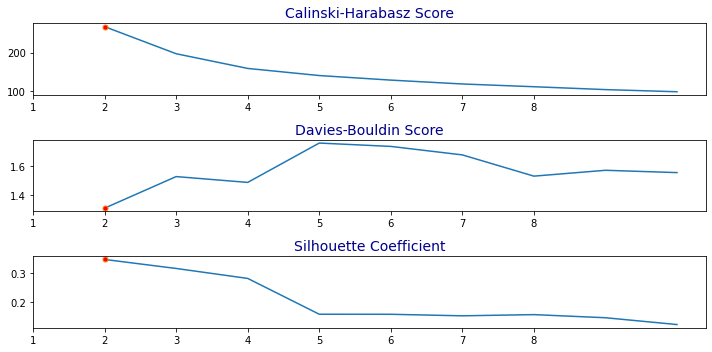

In [166]:
clm = []
for i in range(2,11):
  model=KMeans(n_clusters=i, random_state=1)
  clm.append(model.fit_predict(X_scaled))
num_samp=len(range(2,11))
scores = k_finder(clm,X_scaled,num_samp) 
k_score_info(scores,num_samp,plot=True)

As shown in the graphs above, each of the evaluation methods correctly predicted the correct number of clusters based off of the K-means testing model. We will continue using this function throughout our report to ensure our models are performing accurately.

#### Clustering Evaluation Metrics

External methods compare the clustering results against the ground truth, therefore assumptions about the cluster structure are not required, but a ground truth is [2]. We can use external clustering metrics alongside the internal metrics to determine the accuracy of our generated cluster models once a k-number has been selected.

* **Adjusted Rand Score:** computes a similartiy measure between two clustering by considering all pairs of samples and counting pairs assigned to the same clusters as the true clustering methods. A score of 1 indicates identical clustering to the ground truth. [3]
* **Homogeneity Score:** Clustering result satisfies homogeneity of all clusters only contain datapoints that re members of a single class. A score of 1 indicates perfectly homogeneous labeling [4] 
* **Completeness Score:** A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. A score of 1 indicates perfectly complete labeling. [5]
* **V-measure Score:** The V-measure is the harmonic mean between homogeneity and completeness. A value of 1 indicates perfectly complete labeling. This score is identical to the normalized mutual information score with the arithmetic option chosen for averaging. [6] For this reason, we have omitted the Mutual Information Score from our analysis.
* **Adjusted Mutual Information Score** The measure of the similarity between two labels of the same data taking into account chance. The closer the value is to 1, the better the connection between the target and the features. [7]
* **F1 Score:** The harmonic mean of the precision and recall. F1 reaches its best value at 1 and worst at 0.[8]
* **Jaccard Score:** The similarity coefficient score. The size of the intersection divited by the size of the union of two label sets. Is used to compare sets of predicted labels for a sample to the corresponing set of labels in the true dataset. A higher percentage indicates the model with the most similarity between clusters in the true and predicted datasets.[9] 
* **Fowlkes Mallows Score:** The geometric mean between the precision and recall. A score close to 1 indicates a good similarity between the true and predicted datasets. [10]

We will make a function that applies all of these scoring metrics to a clustering model using a set k-number of clusters.

In [167]:
# Importing the External Testing Metrics
from sklearn.metrics.cluster import adjusted_rand_score # Adjusted Rand Score
from sklearn.metrics.cluster import homogeneity_score   # Homogeneity Score
from sklearn.metrics.cluster import completeness_score  # Completeness Score 
from sklearn.metrics.cluster import v_measure_score     # V-Measure Score 
from sklearn.metrics import f1_score                    # F1 Score
from sklearn.metrics import jaccard_score               # Jaccard Score
from sklearn.metrics import fowlkes_mallows_score       # Fowlkes Mallows Score
from sklearn.metrics import adjusted_mutual_info_score  # Adjusted Mutual Info Score

# Finding the external scoring metrics for a chosen number of K-clusters
# Creating the the dictionary of scores
# clm -> Clustering model
# X -> the X for the chosen dataset
# y -> the ground truth 
# To choose which metrics you want to exclude from testing, set the value to False
# avg='macro' -> sets the default 'average' value for F1 score and Jaccard score to 'macro'
# amis_avg='arithmetic' -> sets the default average_method to 'min' for Adjusted Mutual Information Score
def score_finder(clm,X,y,k,CHS=True,DBS=True,Sil=True,ARS=True,HS=True,CS=True,VMS=True,F1=True,JS=True,FMS=True,AMIS=True,avg='macro',amis_avg='min'):
  # Internal Methods
  print('Number of clusters:',k)
  if CHS == True:
    print('Calinski-Harabasz Score:',round(calinski_harabasz_score(X, clm),3))
  if ARS == True:
    print('Davies-Bouldin Score:',round(davies_bouldin_score(X, clm),3))
  if ARS == True:
    print('Silhouette Score:',round(silhouette_score(X, clm),3))
  # External Methods
  if ARS == True:
    print('Adjusted Rand Score:',round(adjusted_rand_score(y, clm),3))
  if HS == True:  
    print('Homogeneity Score:',round(homogeneity_score(y,clm),3))
  if CS == True:  
    print('Completeness Score:',round(completeness_score(y,clm),3))
  if VMS == True:  
    print('V-measure Score:',round(v_measure_score(y,clm),3))
  if F1 == True:  
    print('F1 Score:',round(f1_score(y,clm,average=avg),3))
  if JS == True:  
    print('Jaccard Score:',round(jaccard_score(y,clm,average=avg),3))
  if FMS == True:
    print('Fowlkes Mallows Score:',round(fowlkes_mallows_score(y,clm),3))
  if AMIS == True:
    print('Adjusted Mutual Information Score:',round(adjusted_mutual_info_score(y,clm,average_method=amis_avg),3))

Now we will test the function using the same KMeans model we created earlier with 2 clusters.

In [168]:
model=KMeans(n_clusters=2, random_state=1).fit_predict(X_scaled)

score_finder(model,X_scaled,y,k=2)

Number of clusters: 2
Calinski-Harabasz Score: 267.696
Davies-Bouldin Score: 1.312
Silhouette Score: 0.345
Adjusted Rand Score: 0.671
Homogeneity Score: 0.544
Completeness Score: 0.565
V-measure Score: 0.555
F1 Score: 0.088
Jaccard Score: 0.046
Fowlkes Mallows Score: 0.85
Adjusted Mutual Information Score: 0.565


This function can now be called upon to give us detailed feedback about our clustering models based on commonly used scoring metrics.

## Clustering Methods
---



### K-means Clustering Method

We want to use K-means to see if we can train the model to predict whether the images are malignant or benign. We will apply the testing metrics created above to a k-means model to determine the optimal number of clusters. For this clustering method, we want to observe the difference between using the original dataset, the scaled dataset, and the PCA dataset. We use Kmeans++ as the initilization method because it provides a more intelligent introduction of centroids and improves the K-means process [11].

In [169]:
# We use k-means++ because it is not dependant on centroid initialization [11]
# We use random_state=1 so we use the same clusters each time the test is run
# Applying K-means clustering to X data
kmeans_X = []
for i in range(2,31):
  X_model=KMeans(n_clusters=i, init="k-means++", random_state=1)
  kmeans_X.append(X_model.fit_predict(X))
# Applying K-means clustering to X_scaled data
kmeans_Xscaled = []
for i in range(2,31):
  Xscaled_model=KMeans(n_clusters=i, init="k-means++",random_state=1)
  kmeans_Xscaled.append(Xscaled_model.fit_predict(X_scaled))
# Applying K-means clustering to the 95% PCA data
kmeans_pca = []
for i in range(2,31):
  Xpca_model=KMeans(n_clusters=i, init="k-means++",random_state=1)
  kmeans_pca.append(Xpca_model.fit_predict(X_pca95))


We will determine the best k-clusters using the scoring function we developed above.

In [170]:
# Determining the best number of samples

# Evaluating the X Data
print('======================================')
print('K-Means on the Original Dataset X')
print('--------------------------------------')
scores = k_finder(kmeans_X,X,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('======================================')
# Evaluating the X_scaled Data
print('K-Means on the Scaled Dataset X_scaled')
print('--------------------------------------')
scores = k_finder(kmeans_Xscaled,X_scaled,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('======================================')
# Evaluating the PCA Data
print('K-Means on the 95% PCA Dataset')
print('--------------------------------------')
scores = k_finder(kmeans_pca,X_pca95,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('======================================')

K-Means on the Original Dataset X
--------------------------------------
Calinski-Harabasz Score
   K-Value:  9
   Score:  1831.494
Davies-Bouldin Score
   K-Value:  2
   Score:  0.504
Silhouette Coefficient
   K-Value:  2
   Score:  0.697
K-Means on the Scaled Dataset X_scaled
--------------------------------------
Calinski-Harabasz Score
   K-Value:  2
   Score:  267.696
Davies-Bouldin Score
   K-Value:  2
   Score:  1.312
Silhouette Coefficient
   K-Value:  2
   Score:  0.345
K-Means on the 95% PCA Dataset
--------------------------------------
Calinski-Harabasz Score
   K-Value:  2
   Score:  288.125
Davies-Bouldin Score
   K-Value:  2
   Score:  1.26
Silhouette Coefficient
   K-Value:  2
   Score:  0.358


When looking at the original X dataset, The Calinski-Harabasz score overfit the model and recomends 29 clusters as the optimal solution. 

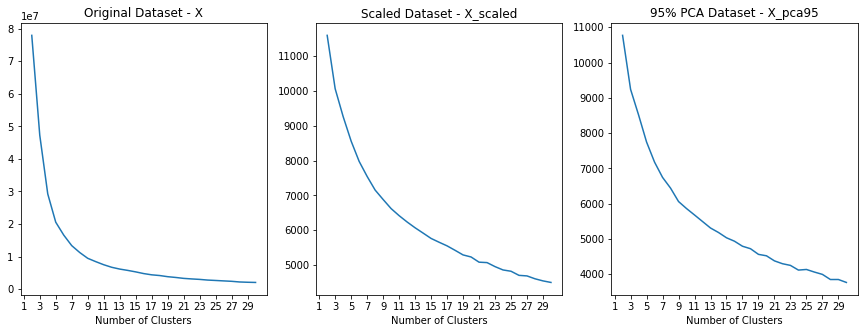

In [171]:
# Initializing the plot
fig2, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

# plotting the sum of squares distance (WWCS) of the datapoints for each of the datsets
# we use fit in this case to return an arra
kmeans_X = []
wcss_X = []
for i in range(2,31):
  X_model=KMeans(n_clusters=i, init="k-means++", random_state=1)
  kmeans_X.append(X_model.fit(X))
  wcss_X.append(X_model.inertia_)
ax1.plot(range(2,31),wcss_X)
ax1.set_xlabel('Number of Clusters')
ax1.set_xticks(np.arange(1,31,2))
ax1.set_title('Original Dataset - X')

# Applying K-means clustering to X_scaled data
kmeans_Xscaled = []
wcss_Xscaled = []
for i in range(2,31):
  Xscaled_model=KMeans(n_clusters=i, init="k-means++",random_state=1)
  kmeans_Xscaled.append(Xscaled_model.fit(X_scaled))
  wcss_Xscaled.append(Xscaled_model.inertia_)
ax2.plot(range(2,31),wcss_Xscaled)
ax2.set_xlabel('Number of Clusters')
ax2.set_xticks(np.arange(1,31,2))
ax2.set_title('Scaled Dataset - X_scaled')

# Applying K-means clustering to the 95% PCA data
kmeans_pca = []
wcss_pca = []
for i in range(2,31):
  pca_model=KMeans(n_clusters=i, init="k-means++",random_state=1)
  kmeans_pca.append(pca_model.fit(X_pca95))
  wcss_pca.append(pca_model.inertia_)
ax3.plot(range(2,31),wcss_pca)
ax3.set_xlabel('Number of Clusters')
ax3.set_xticks(np.arange(1,31,2))
ax3.set_title('95% PCA Dataset - X_pca95')
plt.show()


According to the graphs above, the optimal number of clusters would be 5 according to the the oritinal dataset, and around 8 on the scaled dataset, and around 10 on the 95% PCA dataset. This could indicate overfitting at higher k-numbers in our model.

We will plot the Kmeans model against the Original clustering configuration and see what the difference is. We are only able to visualize the 95% PCA data because most of its variance has been reduced to 2 features. The origianl and scaled datasets have 30 features and are therefore impossible to visualize.

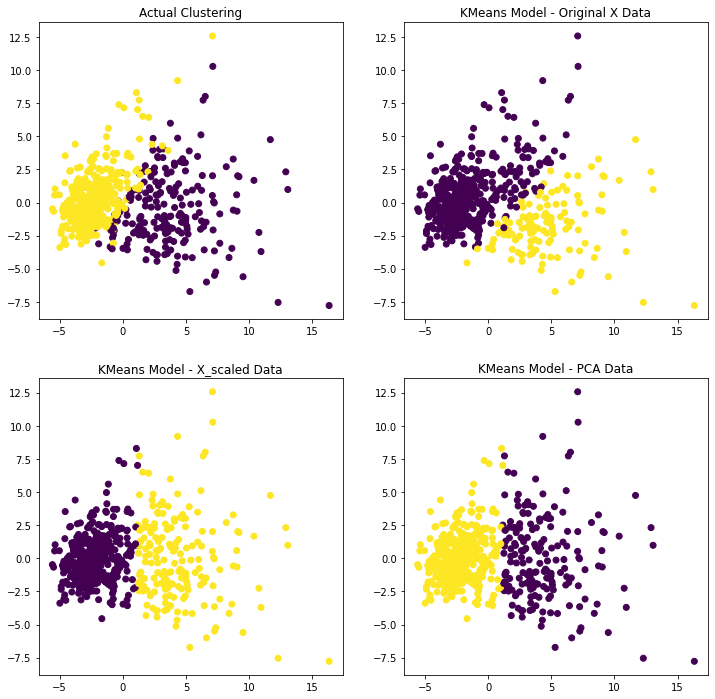

In [172]:
# we want to plot the clustering for the kmeans dataset that uses 2 clusters and see the difference in models
# we will use fit_predict here to return an array of each of the which cluster each datapoint falls into
# importing train_test_split and KMeans methods
from sklearn.cluster import KMeans

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
# Plotting the actual y_values 
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')

# Generating the predicted target values using KMeans on the X dataset
y_scaled_X = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X)
# Plotting the K-means clusters
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=y_scaled_X)
ax2.set_title('KMeans Model - Original X Data')

# Generating the predicted target values using KMeans on the X_scaled dataset
y_scaled_Xs = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X_scaled)
# Plotting the K-means clusters
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=y_scaled_Xs)
ax3.set_title('KMeans Model - X_scaled Data')

# Generating the predicted target values using KMeans on the PCA dataset
y_scaled_pca = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X_pca95)
# Plotting the K-means clusters
ax4.scatter(X_pca95[:,0],X_pca95[:,1],c=y_scaled_pca)
ax4.set_title('KMeans Model - PCA Data')
plt.show()

When comparing the clusterings of the PCA model with the actual clustering, each of the KMeans models are visually similar looking to the actual dataset. There is some variation around the edges, and the KMeans model appears to have a more distict separation than the actual clusters, especially when using the PCA data and the X_scaled data. We will look at the scoring metrics of the model to get a better idea of how it performs.

In [173]:
# Generating the predicted target values using KMeans on the original dataset
kmeans_X_2 = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X)
print('=====================================================')
print('K-Means on the Original Dataset X')
print('--------------------------------------')
score_finder(kmeans_X_2,X,y,k=2)
print('======================================')
# Generating the predicted target values using KMeans on the scaled dataset
kmeans_Xscaled_2 = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X_scaled)
print('K-Means on the Scaled Dataset X_scaled')
print('--------------------------------------')
score_finder(kmeans_Xscaled_2,X_scaled,y,k=2)
print('======================================')
# Generating the predicted target values using KMeans on the PCA dataset
kmeans_X_2_pca = KMeans(n_clusters=2,init='k-means++',random_state=1).fit_predict(X_pca95)
print('K-Means on the 95% PCA Dataset')
print('--------------------------------------')
score_finder(kmeans_X_2_pca,X_pca95,y,k=2)
print('======================================')



K-Means on the Original Dataset X
--------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 1300.208
Davies-Bouldin Score: 0.504
Silhouette Score: 0.697
Adjusted Rand Score: 0.491
Homogeneity Score: 0.422
Completeness Score: 0.517
V-measure Score: 0.465
F1 Score: 0.128
Jaccard Score: 0.073
Fowlkes Mallows Score: 0.792
Adjusted Mutual Information Score: 0.516
K-Means on the Scaled Dataset X_scaled
--------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 267.696
Davies-Bouldin Score: 1.312
Silhouette Score: 0.345
Adjusted Rand Score: 0.671
Homogeneity Score: 0.544
Completeness Score: 0.565
V-measure Score: 0.555
F1 Score: 0.088
Jaccard Score: 0.046
Fowlkes Mallows Score: 0.85
Adjusted Mutual Information Score: 0.565
K-Means on the 95% PCA Dataset
--------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 288.125
Davies-Bouldin Score: 1.26
Silhouette Score: 0.358
Adjusted Rand Score: 0.671
Homogeneity Scor

When comparing the scores between the X dataset, the X_scaled dataset, and the 95% PCA dataset, the internal methods (Calinski-Harabasz, Davies-Bouldin, and silhouette scores) indicate that the original dataset has the best model, followed by the PCA data. This is likely due to the internal nature of the datasets and the lack of comparison with the ground truth. When looking at the external scoring metrics, the X_Scaled and 95% PCA datasets performed the same with every score except the F1 Score and the Jaccard Score - in this case the PCA data outperformed the X_scaled data without data reduction. For this reason, we can say that the 95% PCA data is the best data representation for the K-Means model.

### Gaussian Mixture Model

Next we will try the Gaussian Mixture Model on all three datasets.

In [174]:
# Importing the Gaussian Mixture Model function from sklearn
from sklearn.mixture import GaussianMixture

In [175]:
# Applying Gaussian Mixture Model to the Original X data
GMM_X = []
for i in range(2,31):
  X_model=GaussianMixture(n_components=i)
  GMM_X.append(X_model.fit_predict(X))

# Applying Gaussian Mixture Model to the X_Scaled data
GMM_Xs = []
for i in range(2,31):
  Xscaled_model=GaussianMixture(n_components=i)
  GMM_Xs.append(Xscaled_model.fit_predict(X_scaled))

# Applying Gaussian Mixture Model to the 95% PCA data
GMM_pca = []
for i in range(2,31):
  Xpca_model=GaussianMixture(n_components=i)
  GMM_pca.append(Xpca_model.fit_predict(X_pca95))

In [176]:
# creating the number of samples
num_samp = len(range(2,31))

# Evaluating the X Data
print('=====================================================')
print('Gaussian Mixture Model on the original X Dataset')
print('-----------------------------------------------------')
scores = k_finder(GMM_X,X,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=====================================================')
# Evaluating the X_scaled Data
print('Gaussian Mixture Model on the X_scaled Dataset')
print('-----------------------------------------------------')
scores = k_finder(GMM_Xs,X_scaled,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=====================================================')
# Evaluating the X_pca95 Data
print('Gaussian Mixture Model on the 95% PCA Dataset')
print('-----------------------------------------------------')
scores = k_finder(GMM_pca,X_pca95,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=====================================================')



Gaussian Mixture Model on the original X Dataset
-----------------------------------------------------
Calinski-Harabasz Score
   K-Value:  30
   Score:  2199.488
Davies-Bouldin Score
   K-Value:  4
   Score:  0.616
Silhouette Coefficient
   K-Value:  2
   Score:  0.532
Gaussian Mixture Model on the X_scaled Dataset
-----------------------------------------------------
Calinski-Harabasz Score
   K-Value:  2
   Score:  247.092
Davies-Bouldin Score
   K-Value:  2
   Score:  1.379
Silhouette Coefficient
   K-Value:  2
   Score:  0.315
Gaussian Mixture Model on the 95% PCA Dataset
-----------------------------------------------------
Calinski-Harabasz Score
   K-Value:  3
   Score:  149.592
Davies-Bouldin Score
   K-Value:  26
   Score:  1.63
Silhouette Coefficient
   K-Value:  2
   Score:  0.263


The internal clustering methods are not the most accurate for this model. The Calinski-Harabasz and Davies-Bouldin Scores indicate overfitting for both the original X data and teh 95% PCA Data. The Silhouette coefficient correctly chose 2 clusters for both of these datasets. All three metrics correctly picked 2 cluster for the X_scaled data.

Another method for determining the number of clusters using the Gaussian Mixture Model is the Bayesian Incormation Criterion (BIC). We will calculate this score below for a range of values and see what results we get. A lower BIC score indicates a better model [12]. 

In [177]:
# We will determine the BIC Scores using the Gaussian Mixture Model
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Clustering metrics - alternatives to the elbow method
#   *    Author: Dr. Tirthajyoti Sarkar
#   *    Date: September 7, 2010
#   *    Availability: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb [13]
#   *
#***************************************************************************************/

# BIC on Original X Data
X_BIC = []
X_GMM = []
for i in range(1,31):
    gmm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X)
    X_BIC.append(gmm.bic(X))
    X_GMM.append(gmm.score(X))

# BIC on X_Scaled Data
Xs_BIC = []
Xs_GMM = []
for i in range(1,31):
    gmm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    Xs_BIC.append(gmm.bic(X_scaled))
    Xs_GMM.append(gmm.score(X_scaled))

# BIC on PCA Data
pca_BIC = []
pca_GMM = []
for i in range(1,31):
    gmm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_pca95)
    pca_BIC.append(gmm.bic(X_pca95))
    pca_GMM.append(gmm.score(X_pca95))

BIC Score on Original X Data
------------------------------
   K-Value:  2
   Score:  -38148.477743252435
BIC Score on X_Scaled Data
------------------------------
   K-Value:  5
   Score:  5923.01084014168
BIC Score on PCA Dataset
------------------------------
   K-Value:  4
   Score:  17364.387450753333


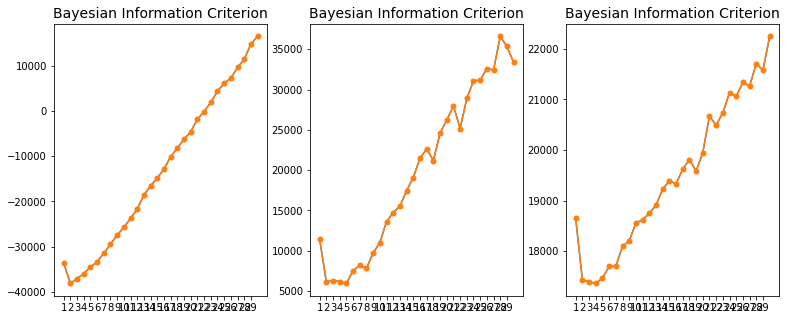

In [178]:
# Plotting the BIC Scores [13] 

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
# X dataset
k = np.arange(1,31)
count=0
for i in X_BIC:
  count += 1
  if i == min(X_BIC):
    k_val = k[count-1]
    bic = X_BIC[count-1]
    print('==============================')
    print('BIC Score on Original X Data')
    print('------------------------------')
    print('   K-Value: ',k_val)
    print('   Score: ',bic)
    ax1.plot(k,X_BIC)
    ax1.set_title('Bayesian Information Criterion',fontdict={'size':14})
    ax1.plot(k, X_BIC, marker="o", markersize=5)
    ax1.set_xticks(np.arange(1,len(range(1,31))))

# X_scaled dataset
k = np.arange(1,31)
count=0
for i in Xs_BIC:
  count += 1
  if i == min(Xs_BIC):
    k_val = k[count-1]
    bic = Xs_BIC[count-1]
    print('==============================')
    print('BIC Score on X_Scaled Data')
    print('------------------------------')
    print('   K-Value: ',k_val)
    print('   Score: ',bic)
    ax2.plot(k,Xs_BIC)
    ax2.set_title('Bayesian Information Criterion',fontdict={'size':14})
    ax2.plot(k, Xs_BIC, marker="o", markersize=5)
    ax2.set_xticks(np.arange(1,len(range(1,31))))

# X_pca95 dataset
k = np.arange(1,31)
count=0
for i in pca_BIC:
  count += 1
  if i == min(pca_BIC):
    k_val = k[count-1]
    bic = pca_BIC[count-1]
    print('==============================')
    print('BIC Score on PCA Dataset')
    print('------------------------------')
    print('   K-Value: ',k_val)
    print('   Score: ',bic)
    print('==============================')
    ax3.plot(k,pca_BIC)
    ax3.set_title('Bayesian Information Criterion',fontdict={'size':14})
    ax3.plot(k, pca_BIC, marker="o", markersize=5)
    ax3.set_xticks(np.arange(1,len(range(1,31))))
    plt.show()

When looking at the Bayesian Information Criterion for our dataset with clusters ranging from 2 to 30, the model has incorrectly chosen 4 as the optimal number of clusters.

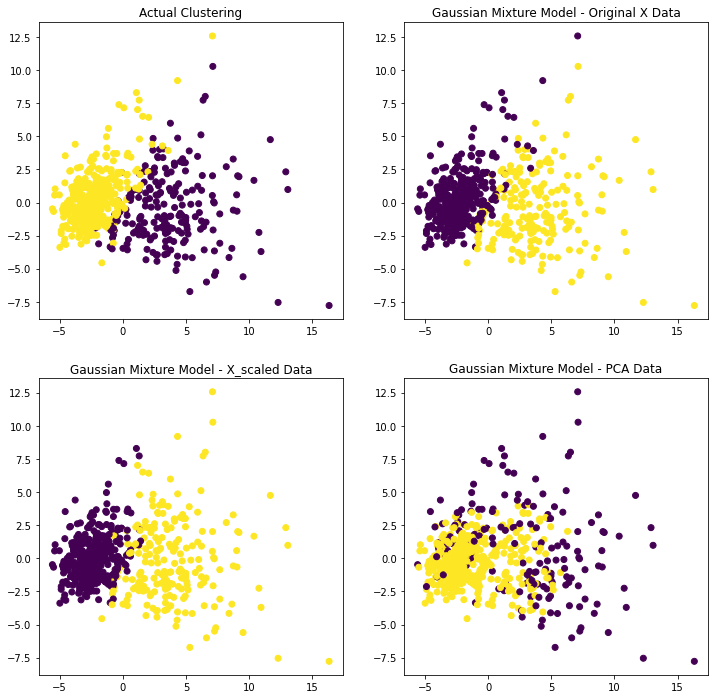

In [179]:
# Creating the GMM for 2 components
GMM = GaussianMixture(n_components=2)

# Applying the Gaussian Mixture Model
# Original X data
X_GMM = GMM.fit_predict(X)
# X_Scaled Data
Xs_GMM = GMM.fit_predict(X_scaled)
# 95% PCA Data
PCA_GMM = GMM.fit_predict(X_pca95)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
# Plotting the actual y_values 
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')

# Plotting the GMM clusters
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=X_GMM)
ax2.set_title('Gaussian Mixture Model - Original X Data')

# Plotting the GMM clusters
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=Xs_GMM)
ax3.set_title('Gaussian Mixture Model - X_scaled Data')

# Plotting the GMM clusters
ax4.scatter(X_pca95[:,0],X_pca95[:,1],c=PCA_GMM)
ax4.set_title('Gaussian Mixture Model - PCA Data')
plt.show()

When looking at the clusterings for the Gaussian Mixture model, the original X data and the X_Scaled data appear to perform better than the PCA data. We will look at the numerical values next to decide which is the better dataset to use with this model.

In [180]:
# Generating the predicted target values using GMM on the PCA dataset
print('=====================================================')
print('Gaussian Mixture Model on the Original X Dataset')
print('-----------------------------------------------------')
score_finder(X_GMM,X,y,k=2)
print('=====================================================')
print('Gaussian Mixture Model on the X_scaled Dataset')
print('-----------------------------------------------------')
score_finder(Xs_GMM,X,y,k=2)
print('=====================================================')
print('Gaussian Mixture Model on the 95% PCA Dataset')
print('-----------------------------------------------------')
score_finder(PCA_GMM,X,y,k=2)
print('=====================================================')

Gaussian Mixture Model on the Original X Dataset
-----------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 675.566
Davies-Bouldin Score: 0.701
Silhouette Score: 0.532
Adjusted Rand Score: 0.812
Homogeneity Score: 0.703
Completeness Score: 0.709
V-measure Score: 0.706
F1 Score: 0.049
Jaccard Score: 0.025
Fowlkes Mallows Score: 0.912
Adjusted Mutual Information Score: 0.709
Gaussian Mixture Model on the X_scaled Dataset
-----------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 556.911
Davies-Bouldin Score: 0.765
Silhouette Score: 0.494
Adjusted Rand Score: 0.774
Homogeneity Score: 0.662
Completeness Score: 0.66
V-measure Score: 0.661
F1 Score: 0.06
Jaccard Score: 0.031
Fowlkes Mallows Score: 0.894
Adjusted Mutual Information Score: 0.662
Gaussian Mixture Model on the 95% PCA Dataset
-----------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 78.342
Davies-Bouldin

After analyzing the the Gaussian Mixture Model using all three datasets, it appears to have performed the best on the original, unscaled dataset in every scoring metric except for the F1 score and the Jaccard Score. Therefore, we can conclude that the Gaussian Mixture Model performs the best on the original dataset.

### Hierarchical Agglomerative Clustering

Similar to k-means, hierarchical aglomerative clustering is used to group together data points with similar characteristcs. In this section we will explore a bottom-up hierarchical agglomerative clustering model. [14]

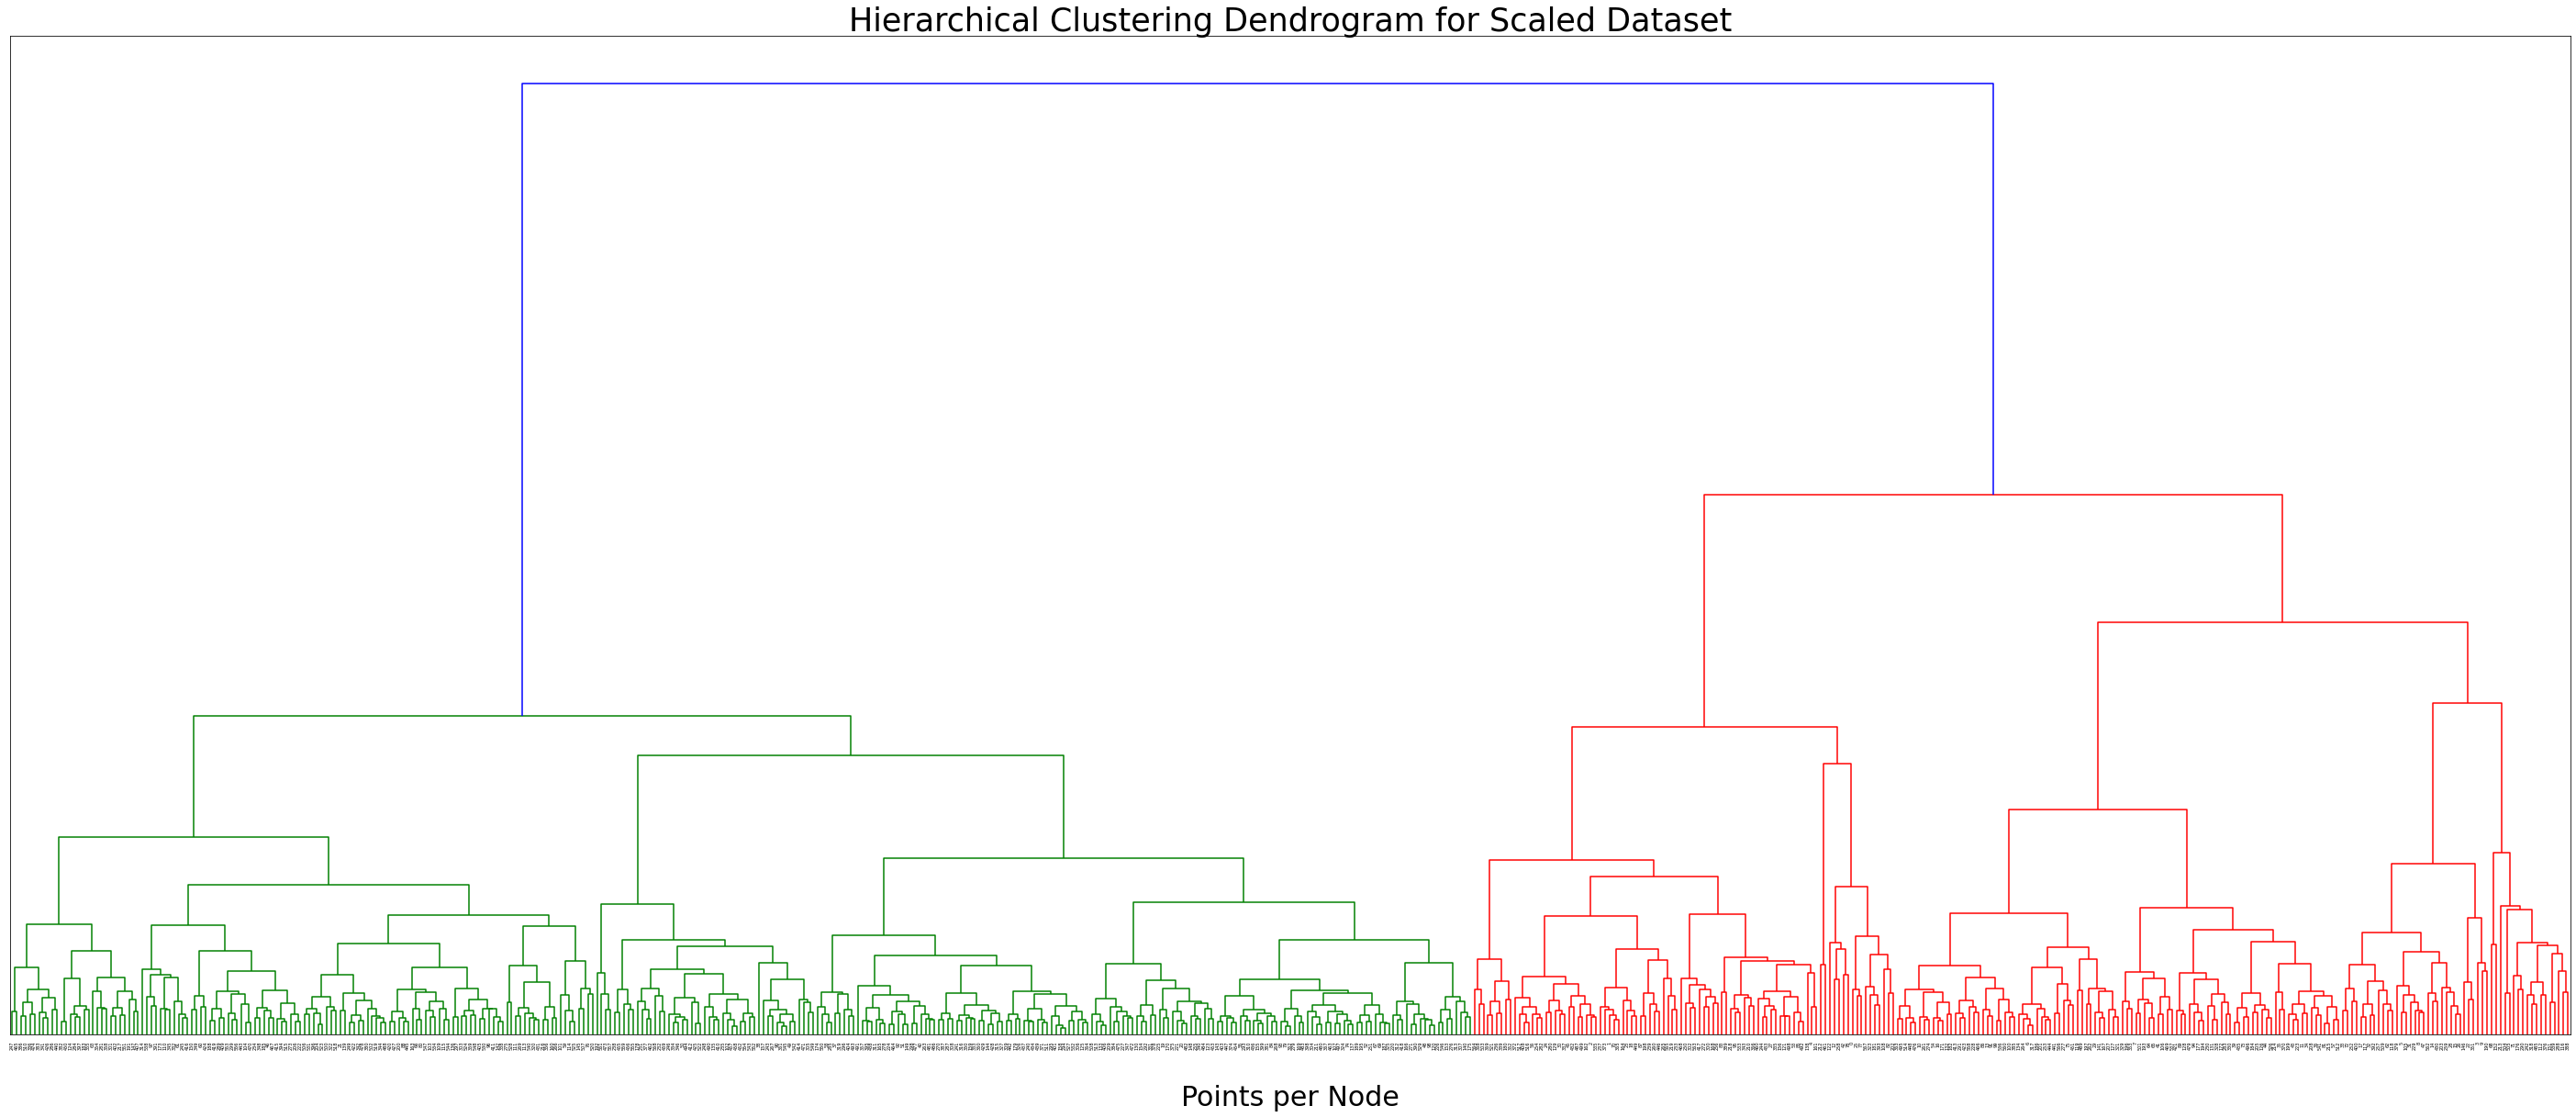

In [181]:
# We will start by plotting a dendrogram to visualize our clusters
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Plot Hierarchical Clustering Dendrogram
#   *    Author: scikit-learn
#   *    Availability: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html [15]
#   *
#***************************************************************************************/

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# generating the Agglomeratice Clustering Model
ACM = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
# Training the model to the X_pca95 dataset
ACM = ACM.fit(X_pca95)

# create the counts of samples under each node
counts = np.zeros(ACM.children_.shape[0])
n_samples = len(ACM.labels_)
for i, merge in enumerate(ACM.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [ACM.children_, ACM.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
fig, ax = plt.subplots(figsize=(50,20))
dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram for Scaled Dataset",fontdict={'size':35})
# plot the top three levels of the dendrogram
plt.xlabel("\nPoints per Node",fontdict={'size':30})
plt.xticks()
plt.yticks([],[])
plt.show()

This dendogram provides a visual representation of the cluster formations in our dataset when transformed using the Agglmoerative Clustering model. When looking at the hierarchical clustering model, we can imagine a horizontal line intesecting the model. We move this line upwards, starting at the bottom of the dendogram and moving towards the top. We find the optimal number of clusters when we reach a point on the graph where the line does not have any other horizontal lines to interact with. The number of vertical lines running through the dendogram at that point is the optimal number of clusters. Using this method on our dendogram we find two clusters, as represented by the blue line [15].

While this dendogram provides a visual representation of the cluster formations in our dataset, it's cluttered appearance is not very practical to look at and make decisions off of. Now we will use scikit learn to apply Hierarchical clustering in a way that is easier to understand. We will use the agglomerative clustering method we used above to determine the best number of clusters for our dataset by testing it for a number of k-values.



In [182]:
# Agglomerative clustering on the original X dataset
agm_X = []
for i in range(2,31):
  agm_X.append(AgglomerativeClustering(n_clusters=i).fit_predict(X))

# Agglomerative clustering on the X_scaled dataset
agm_Xs = []
for i in range(2,31):
  agm_Xs.append(AgglomerativeClustering(n_clusters=i).fit_predict(X_scaled))


# Agglomerative clustering on the 95% PCA dataset
agm_pca = []
for i in range(2,31):
  agm_pca.append(AgglomerativeClustering(n_clusters=i).fit_predict(X_pca95))



In [183]:
# creating the number of samples
num_samp = len(range(2,31))

# Evaluating the original X Data
print('=============================================================')
print('Agglomerative Clustering Model on the Original X Dataset')
print('-------------------------------------------------------------')
scores = k_finder(agm_X,X,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=============================================================')
# Evaluating the X_scaled Data
print('Agglomerative Clustering Model on the X_scaled Dataset')
print('-------------------------------------------------------------')
scores = k_finder(agm_Xs,X_scaled,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=============================================================')
# Evaluating the 95% PCA Data
print('Agglomerative Clustering Model on the 95% PCA Dataset')
print('-------------------------------------------------------------')
scores = k_finder(agm_pca,X_pca95,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('=============================================================')

Agglomerative Clustering Model on the Original X Dataset
-------------------------------------------------------------
Calinski-Harabasz Score
   K-Value:  30
   Score:  2182.763
Davies-Bouldin Score
   K-Value:  2
   Score:  0.479
Silhouette Coefficient
   K-Value:  2
   Score:  0.69
Agglomerative Clustering Model on the X_scaled Dataset
-------------------------------------------------------------
Calinski-Harabasz Score
   K-Value:  2
   Score:  248.629
Davies-Bouldin Score
   K-Value:  2
   Score:  1.37
Silhouette Coefficient
   K-Value:  2
   Score:  0.339
Agglomerative Clustering Model on the 95% PCA Dataset
-------------------------------------------------------------
Calinski-Harabasz Score
   K-Value:  2
   Score:  244.094
Davies-Bouldin Score
   K-Value:  2
   Score:  1.38
Silhouette Coefficient
   K-Value:  2
   Score:  0.296


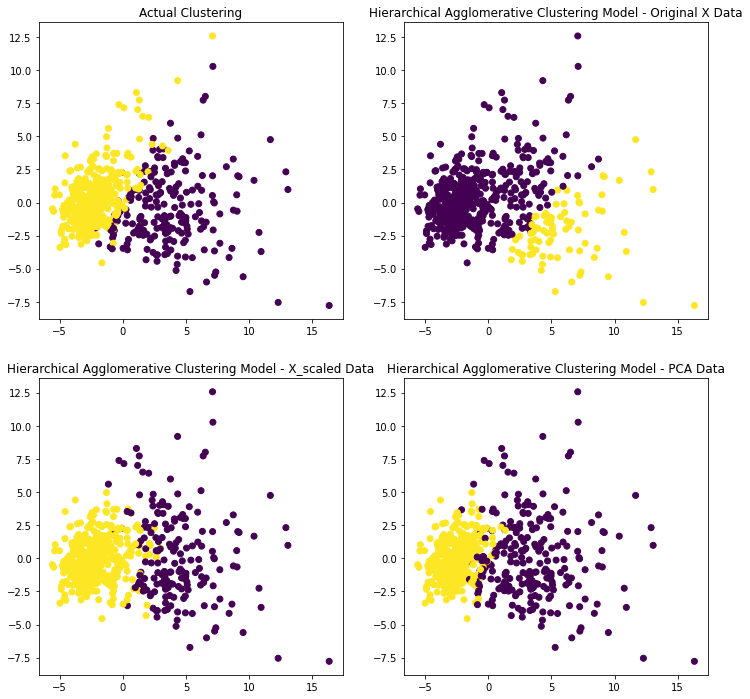

In [184]:
# Generating the Agglomerative Clustering Dataset
# Original X data
agm_X = AgglomerativeClustering(n_clusters=2).fit_predict(X)
# X_scaled Data
agm_Xs = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)
# PCA Data
agm_pca = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca95)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
# Plotting the actual y_values 
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')

# Plotting the Agglomerative Clustering Model clusters
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=agm_X)
ax2.set_title('Hierarchical Agglomerative Clustering Model - Original X Data')

# Plotting the Agglomerative Clustering Model clusters
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=agm_Xs)
ax3.set_title('Hierarchical Agglomerative Clustering Model - X_scaled Data')

# Plotting the Agglomerative Clustering Model clusters
ax4.scatter(X_pca95[:,0],X_pca95[:,1],c=agm_pca)
ax4.set_title('Hierarchical Agglomerative Clustering Model - PCA Data')
plt.show()


Upon visual inspection, the Agglomerative clustering method appears to be very similar to the actual clustering, particularly for the PCA dataset. We will now calculate the scoring metrics to see which model is the best fit.

In [185]:
# Agglomerative clustering on the original dataset - n_clusters=2
print('======================================================')
# Original X dataset
print('Agglomerative Clustering Model on the Original X Dataset')
print('------------------------------------------------------')
score_finder(agm_X,X,y,k=2)
print('======================================================')
# X_scaled dataset
print('Agglomerative Clustering Model on the X_Scaled Dataset')
print('------------------------------------------------------')
score_finder(agm_Xs,X_pca95,y,k=2)
print('======================================================')
# PCA Dataset
print('Agglomerative Clustering Model on the 95% PCA Dataset')
print('------------------------------------------------------')
score_finder(agm_pca,X_pca95,y,k=2)
print('======================================================')

Agglomerative Clustering Model on the Original X Dataset
------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 1088.162
Davies-Bouldin Score: 0.479
Silhouette Score: 0.69
Adjusted Rand Score: 0.287
Homogeneity Score: 0.262
Completeness Score: 0.408
V-measure Score: 0.319
F1 Score: 0.181
Jaccard Score: 0.111
Fowlkes Mallows Score: 0.739
Adjusted Mutual Information Score: 0.406
Agglomerative Clustering Model on the X_Scaled Dataset
------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 267.102
Davies-Bouldin Score: 1.317
Silhouette Score: 0.351
Adjusted Rand Score: 0.575
Homogeneity Score: 0.446
Completeness Score: 0.468
V-measure Score: 0.457
F1 Score: 0.868
Jaccard Score: 0.769
Fowlkes Mallows Score: 0.807
Adjusted Mutual Information Score: 0.467
Agglomerative Clustering Model on the 95% PCA Dataset
------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz

After comparing the scoring metrics for each dataset, we ca see that the Agglomerative Clustering Model done on the PCA data outperforms in every external scoring metric. The internal scoring metrics chose the original dataset as the best option, but since they do not take into consideration the ground truth we can consider the internal metrics to be more important. For this reason, we conclude that Hierarchical Agglomeratve Clustering performs best on PCA transformed data for this dataset.

### Density-Based Spatial Clustering of Aplications with noise (DBSCAN)


The DBSCAN clustering method determines the optimal number of clusters for us, so we do not need to iterate through a bunch of different clusters to find the best one. Since this method works a bit differnetly, we will apply the scoring metrics separately and not make use of our functions.

In [186]:
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Demo of DBSCAN clustering algorithm
#   *    Author: scikit-learn
#   *    Availability: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html [16]
#   *
#***************************************************************************************/
from sklearn.cluster import DBSCAN
# Computing DBSCAN for Original X data
db_X = DBSCAN(eps=0.3, min_samples=6).fit(X)
core_samples_mask = np.zeros_like(db_X.labels_,dtype=bool)
core_samples_mask[db_X.core_sample_indices_] = True
X_labels = db_X.labels_
# Number of clusters in labels, ignoring noise if present
X_n_clusters_ = len(set(X_labels)) - (1 if -1 in X_labels else 0)
X_n_noise_ = list(X_labels).count(-1)

# Computing DBSCAN for X_Scaled data
db_Xs = DBSCAN(eps=0.3, min_samples=6).fit(X_scaled)
core_samples_mask = np.zeros_like(db_Xs.labels_,dtype=bool)
core_samples_mask[db_Xs.core_sample_indices_] = True
Xs_labels = db_Xs.labels_
# Number of clusters in labels, ignoring noise if present
Xs_n_clusters_ = len(set(Xs_labels)) - (1 if -1 in Xs_labels else 0)
Xs_n_noise_ = list(Xs_labels).count(-1)

# Computing DBSCAN for PCA data
db_pca = DBSCAN(eps=0.3, min_samples=6).fit(X_pca95)
core_samples_mask = np.zeros_like(db_pca.labels_,dtype=bool)
core_samples_mask[db_pca.core_sample_indices_] = True
pca_labels = db_pca.labels_

# Number of clusters in labels, ignoring noise if present
pca_n_clusters_ = len(set(pca_labels)) - (1 if -1 in pca_labels else 0)
pca_n_noise_ = list(pca_labels).count(-1)

# Our scoring function will not work well on this model so we will manually 
# calculate the scores below for Original X Data
print('======================================================')
print('DBSCAN Model on the Original X Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% X_n_clusters_)
print('Estimated number of noise points: %0.3f'% X_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, X_labels))
print("Completeness: %0.3f" % completeness_score(y, X_labels))
print("V-measure: %0.3f" % v_measure_score(y, X_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, X_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, X_labels))
print('======================================================')
# Our scoring function will not work well on this model so we will manually 
# calculate the scores below
print('DBSCAN Model on the X_scaled Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% Xs_n_clusters_)
print('Estimated number of noise points: %0.3f'% Xs_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, Xs_labels))
print("Completeness: %0.3f" % completeness_score(y, Xs_labels))
print("V-measure: %0.3f" % v_measure_score(y, Xs_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, Xs_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, Xs_labels))
print('======================================================')
# Our scoring function will not work well on this model so we will manually 
# calculate the scores below
print('DBSCAN Model on the 95% PCA Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% pca_n_clusters_)
print('Estimated number of noise points: %0.3f'% pca_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, pca_labels))
print("Completeness: %0.3f" % completeness_score(y, pca_labels))
print("V-measure: %0.3f" % v_measure_score(y, pca_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, pca_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, pca_labels))
print('======================================================')

DBSCAN Model on the Original X Dataset
------------------------------------------------------
Estimated number of clusters: 0.000
Estimated number of noise points: 569.000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN Model on the X_scaled Dataset
------------------------------------------------------
Estimated number of clusters: 0.000
Estimated number of noise points: 569.000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN Model on the 95% PCA Dataset
------------------------------------------------------
Estimated number of clusters: 0.000
Estimated number of noise points: 569.000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


Looking at these scoring metrics, we get scores of zero or 1, all of which indicate that this model is not a good representation of our dataset. It is essentially seeing every point as noise and not creating any clusters at all. We need to optimixe our epsilon feature. To optimize epsilon, we will generate a k-distance graph using sklearns NearestNeighbors function [17].

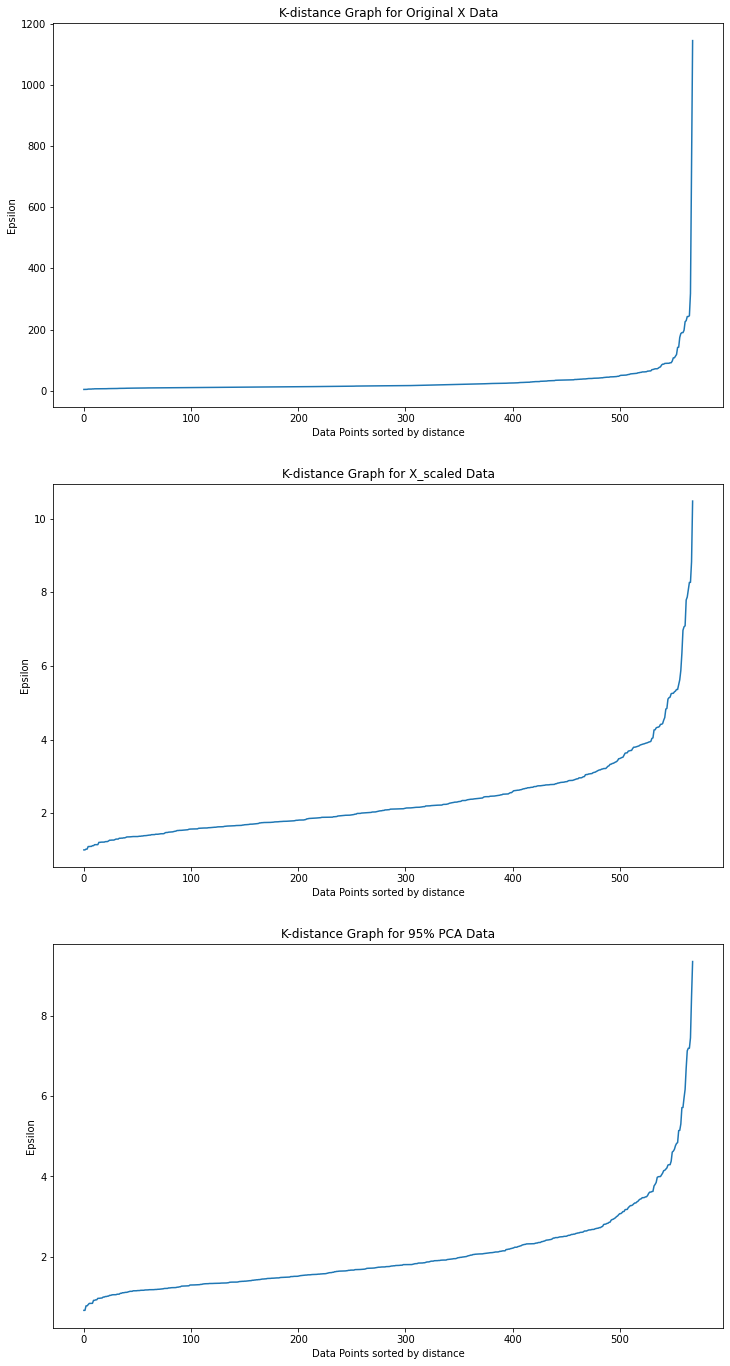

In [187]:
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning
#   *    Author: Abhishek Sharma
#   *    Date: September 8, 2020
#   *    Availability: https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,by%20regions%20of%20lower%20density.&text=It%20can%20identify%20clusters%20in,density%20of%20the%20data%20points. [17]
#   *
#***************************************************************************************/
from sklearn.neighbors import NearestNeighbors
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,24))

# X Dataset
NN = NearestNeighbors(n_neighbors=2)
nn = NN.fit(X)
Xdistances,Xindices = nn.kneighbors(X)
# Plotting to find the value of epsilon
Xdistances = np.sort(Xdistances,axis=0)
Xdistances=Xdistances[:,1]
ax1.plot(Xdistances)
ax1.set_title('K-distance Graph for Original X Data')
ax1.set_xlabel('Data Points sorted by distance')
ax1.set_ylabel('Epsilon')


# X_scaled Dataset
NN = NearestNeighbors(n_neighbors=2)
nn = NN.fit(X_scaled)
Xsdistances,Xsindices = nn.kneighbors(X_scaled)
# Plotting to find the value of epsilon
Xsdistances = np.sort(Xsdistances,axis=0)
Xsdistances=Xsdistances[:,1]
ax2.plot(Xsdistances)
ax2.set_title('K-distance Graph for X_scaled Data')
ax2.set_xlabel('Data Points sorted by distance')
ax2.set_ylabel('Epsilon')


# PCA Dataset
NN = NearestNeighbors(n_neighbors=2)
nn = NN.fit(X_pca95)
PCAdistances,PCAindices = nn.kneighbors(X_pca95)
# Plotting to find the value of epsilon
PCAdistances = np.sort(PCAdistances,axis=0)
PCAdistances=PCAdistances[:,1]
ax3.plot(PCAdistances)
ax3.set_title('K-distance Graph for 95% PCA Data')
ax3.set_xlabel('Data Points sorted by distance')
ax3.set_ylabel('Epsilon')
plt.show()

The best optimum is the elbow on the graph. We approximate this is 100 for the x data, 3.5 for the scaled data and 3 for the PCA data. Now that we have improved that we will try DBSCAN again with these new numbers.

In [188]:
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Demo of DBSCAN clustering algorithm
#   *    Author: scikit-learn
#   *    Availability: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html [16]
#   *
#***************************************************************************************/
from sklearn.cluster import DBSCAN
# Computing DBSCAN for Original X data
db_X = DBSCAN(eps=100, min_samples=6).fit(X)
core_samples_mask = np.zeros_like(db_X.labels_,dtype=bool)
core_samples_mask[db_X.core_sample_indices_] = True
X_labels = db_X.labels_
# Number of clusters in labels, ignoring noise if present
X_n_clusters_ = len(set(X_labels)) - (1 if -1 in X_labels else 0)
X_n_noise_ = list(X_labels).count(-1)

# Computing DBSCAN for X_Scaled data
db_Xs = DBSCAN(eps=3.5, min_samples=6).fit(X_scaled)
core_samples_mask = np.zeros_like(db_Xs.labels_,dtype=bool)
core_samples_mask[db_Xs.core_sample_indices_] = True
Xs_labels = db_Xs.labels_
# Number of clusters in labels, ignoring noise if present
Xs_n_clusters_ = len(set(Xs_labels)) - (1 if -1 in Xs_labels else 0)
Xs_n_noise_ = list(Xs_labels).count(-1)

# Computing DBSCAN for PCA data
db_pca = DBSCAN(eps=3, min_samples=6).fit(X_pca95)
core_samples_mask = np.zeros_like(db_pca.labels_,dtype=bool)
core_samples_mask[db_pca.core_sample_indices_] = True
pca_labels = db_pca.labels_

# Number of clusters in labels, ignoring noise if present
pca_n_clusters_ = len(set(pca_labels)) - (1 if -1 in pca_labels else 0)
pca_n_noise_ = list(pca_labels).count(-1)

# Our scoring function will not work well on this model so we will manually 
# calculate the scores below for Original X Data
print('======================================================')
print('DBSCAN Model on the Original X Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% X_n_clusters_)
print('Estimated number of noise points: %0.3f'% X_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, X_labels))
print("Completeness: %0.3f" % completeness_score(y, X_labels))
print("V-measure: %0.3f" % v_measure_score(y, X_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, X_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, X_labels))
print('======================================================')
# Our scoring function will not work well on this model so we will manually 
# calculate the scores below
print('DBSCAN Model on the X_scaled Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% Xs_n_clusters_)
print('Estimated number of noise points: %0.3f'% Xs_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, Xs_labels))
print("Completeness: %0.3f" % completeness_score(y, Xs_labels))
print("V-measure: %0.3f" % v_measure_score(y, Xs_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, Xs_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, Xs_labels))
print('======================================================')
# Our scoring function will not work well on this model so we will manually 
# calculate the scores below
print('DBSCAN Model on the 95% PCA Dataset')
print('------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% pca_n_clusters_)
print('Estimated number of noise points: %0.3f'% pca_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, pca_labels))
print("Completeness: %0.3f" % completeness_score(y, pca_labels))
print("V-measure: %0.3f" % v_measure_score(y, pca_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, pca_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, pca_labels))
print('======================================================')

DBSCAN Model on the Original X Dataset
------------------------------------------------------
Estimated number of clusters: 1.000
Estimated number of noise points: 35.000
Homogeneity: 0.097
Completeness: 0.278
V-measure: 0.144
Adjusted Rand Index: 0.097
Adjusted Mutual Information: 0.142
DBSCAN Model on the X_scaled Dataset
------------------------------------------------------
Estimated number of clusters: 1.000
Estimated number of noise points: 77.000
Homogeneity: 0.031
Completeness: 0.051
V-measure: 0.038
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.037
DBSCAN Model on the 95% PCA Dataset
------------------------------------------------------
Estimated number of clusters: 1.000
Estimated number of noise points: 85.000
Homogeneity: 0.028
Completeness: 0.044
V-measure: 0.035
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.033


After improving our DBSCAN model, we obtained better results, althrough still slightly inaccurate as the model only approximates 1 cluster for each of the datasets.  When analyzing the scoring metrics, the DBSCAN method performed the highest on the X dataset. Even so, the scores were low in each of the tested categories, indicated that the model is not the most accurate overall. We will plot these results to see if the vizualization of the clusters confirms this.

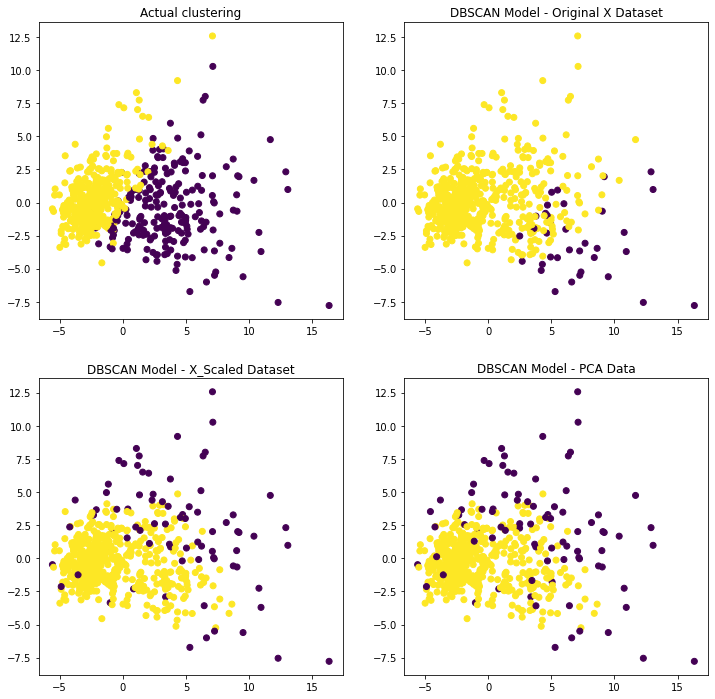

In [189]:
from sklearn.cluster import DBSCAN
# Scatter plots
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))

# Actual Clustering
ax1.scatter(X_pca95[:,0], X_pca95[:,1], c=y)
ax1.set_title("Actual clustering")
# Original X Dataset
ax2.scatter(X_pca95[:,0], X_pca95[:,1], c=X_labels)
ax2.set_title("DBSCAN Model - Original X Dataset")
# X_Scaled Dataset
ax3.scatter(X_pca95[:,0], X_pca95[:,1], c=Xs_labels)
ax3.set_title("DBSCAN Model - X_Scaled Dataset")
# 95% PCA Dataset
ax4.scatter(X_pca95[:,0], X_pca95[:,1], c=pca_labels)
ax4.set_title("DBSCAN Model - PCA Data")
plt.show()


From looking at the scatterplots of the DBSCAN data, we can see the single cluster with the purple noise points making up the second "cluster." This confirms the results of the scoring metric and indicates that DBSCAN is not a good clustering method for our dataset.

### Spectral Clustering Methods

In [190]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering on X data
# SCX = []
# for i in range(2,31):
#   scX = SpectralClustering(n_clusters=i,  gamma=0.5, assign_labels='kmeans')
#   SCX.append(scX.fit_predict(X))
''' Spectral Clustering model would not run on the original X dataset, 
so we will not analyze this dataset for this model.'''

# Spectral Clustering on X_scaled data
SCXs = []
for i in range(2,31):
  scXs = SpectralClustering(n_clusters=i,  gamma=0.5, assign_labels='kmeans')
  SCXs.append(scXs.fit_predict(X_scaled))


# Spectral Clustering on X_pca95 data
SCpca = []
for i in range(2,31):
  sc = SpectralClustering(n_clusters=i,  gamma=0.5, assign_labels='kmeans')
  SCpca.append(sc.fit_predict(X_pca95))


In [191]:
# creating the number of samples
num_samp = len(range(2,31))

# # Evaluating the Original X Data
# print('Spectral Clustering Model on the Original X Dataset')
# print('-------------------------------------------------------------')
# scores = k_finder(SCX,X,num_samp) 
# k_score_info(scores,num_samp,plot=False)

# Evaluating the X_Scaled Data
print('====================================================')
print('Spectral Clustering Model on the X_scaled Dataset')
print('----------------------------------------------------')
scores = k_finder(SCXs,X_scaled,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('====================================================')
# Evaluating the 95% PCA Data
print('Spectral Clustering Model on the 95% PCA Dataset')
print('----------------------------------------------------')
scores = k_finder(SCpca,X_pca95,num_samp) 
k_score_info(scores,num_samp,plot=False)
print('====================================================')

Spectral Clustering Model on the X_scaled Dataset
----------------------------------------------------
Calinski-Harabasz Score
   K-Value:  3
   Score:  118.306
Davies-Bouldin Score
   K-Value:  2
   Score:  0.45
Silhouette Coefficient
   K-Value:  2
   Score:  0.661
Spectral Clustering Model on the 95% PCA Dataset
----------------------------------------------------
Calinski-Harabasz Score
   K-Value:  4
   Score:  99.897
Davies-Bouldin Score
   K-Value:  2
   Score:  0.42
Silhouette Coefficient
   K-Value:  2
   Score:  0.665


The spectral clustering model was unable to run on the unscaled dataset so we have chosen to focus on the transformed data for this model. Using our scoring metrics, the Silhouette Coefficient and Davies-Bouldin Score both correctly chose two clusters as the optimal k-number, where Calinki-Harabasz suggested an overfit model with 3 clusters for the X_scaled data and 4 clusters for the PCA data.

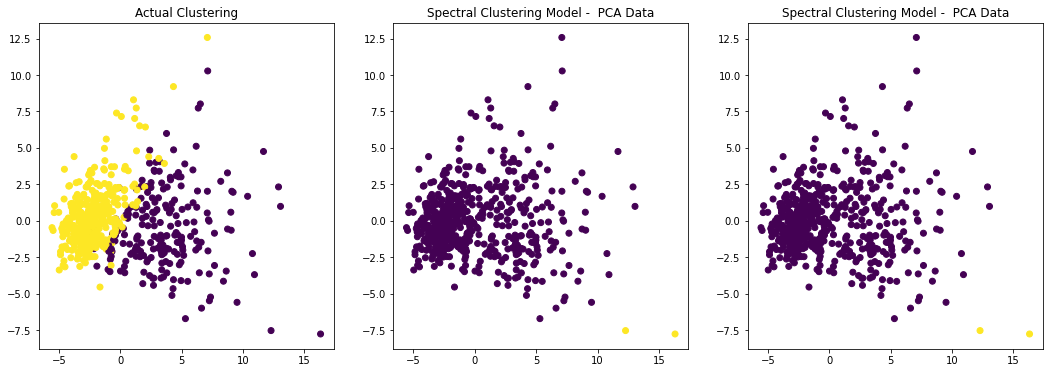

In [192]:
# SC Model for X_Scaled Dataset
scXs = SpectralClustering(n_clusters=2,  gamma=0.5, assign_labels='kmeans')
SC_Xs=scXs.fit_predict(X_scaled)

# SC Model for 95% PCA Dataset
sc = SpectralClustering(n_clusters=2,  gamma=0.5, assign_labels='kmeans')
SC_pca=sc.fit_predict(X_pca95)


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
# Actual Dataset
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')
# X_Scaled Dataset
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=SC_Xs)
ax2.set_title('Spectral Clustering Model -  PCA Data')
# PCA Dataset
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=SC_pca)
ax3.set_title('Spectral Clustering Model -  PCA Data')
plt.show()


Visual inspection of our clusters indicates that the Spectral Clustering model is likely not a good representation of the dataset since the yellow cluster only consists of two datapoints for both the X_Scaled and the PCA datasets. However, when we tried optimizing the spectral clustering method more it was unable to run on our data. Therefore, this is the best model we were able to obtain.

In [193]:
# Generating the scores
# X_Scaled Dataset
print('=========================================')
print('Spectral Clustering on X_Scaled Data')
print('-----------------------------------------')
score_finder(SC_Xs,X_scaled,y,k=2)
print('=========================================')
# PCA Dataset
print('Spectral Clustering on 95% PCA Data')
print('-----------------------------------------')
score_finder(SC_pca,X_pca95,y,k=2)
print('=========================================')

Spectral Clustering on X_Scaled Data
-----------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 27.873
Davies-Bouldin Score: 0.45
Silhouette Score: 0.661
Adjusted Rand Score: 0.005
Homogeneity Score: 0.005
Completeness Score: 0.149
V-measure Score: 0.01
F1 Score: 0.27
Jaccard Score: 0.185
Fowlkes Mallows Score: 0.728
Adjusted Mutual Information Score: 0.104
Spectral Clustering on 95% PCA Data
-----------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 28.81
Davies-Bouldin Score: 0.42
Silhouette Score: 0.665
Adjusted Rand Score: 0.005
Homogeneity Score: 0.005
Completeness Score: 0.149
V-measure Score: 0.01
F1 Score: 0.27
Jaccard Score: 0.185
Fowlkes Mallows Score: 0.728
Adjusted Mutual Information Score: 0.104


When looking at the plots of the Spectral Clustering model, we can see that the two clusters are totally unbalanced. The low scores on the evaluation confirm that this metric is not a good comparison. While the model performed slighly better on the PCA dataset, it is not an accurate representation of either model.

### Mean Shifting Method - Hierarchical Clustering Method

The Mean Shifting algorithm calculates the optimal number of cluster centers by using a convergence method based on the radius bandwidth of the clusters.

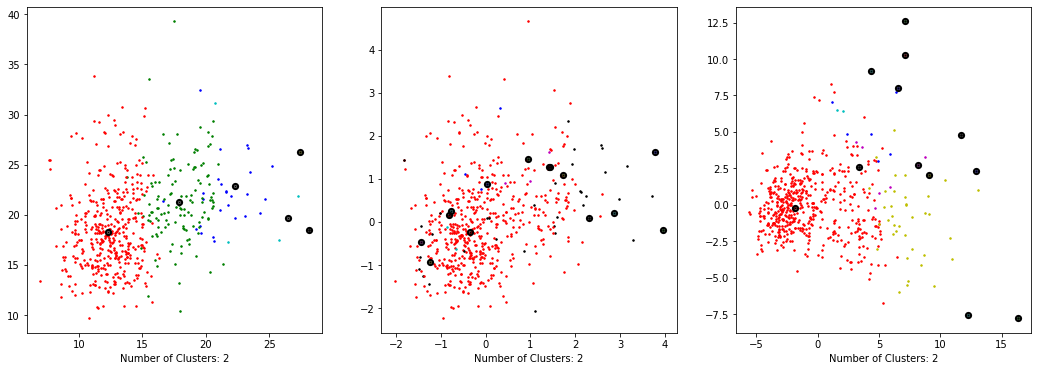

In [194]:
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Mean Shift Intro - Practical Machine Learning Tutorial with Python p. 39
#   *    Author: scikit-learn
#   *    Availability: https://www.youtube.com/watch?v=3ERPpzrDkVg [18]
#   *
#***************************************************************************************/

from sklearn.cluster import MeanShift

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
colors = 10 * ['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']

# Mean shift on Original X Data
msX=MeanShift()
msX.fit(X)
X_labels_mean=msX.labels_
X_predict=msX.fit_predict(X)
X_cluster_centers=msX.cluster_centers_
X_n_clusters_ = len(np.unique(y))

for i in range(len(X)):
    ax1.plot(X[i][0], X[i][1], colors[X_labels_mean[i]], markersize=3)
ax1.scatter(X_cluster_centers[:, 0], X_cluster_centers[:, 1], marker=".", color='k', s=20, linewidths=5, zorder=10)
ax1.set_xlabel('Number of Clusters: %d'%X_n_clusters_)

# Mean shift on Original X Data
msXs=MeanShift()
msXs.fit(X_scaled)
Xs_labels_mean=msXs.labels_
Xs_predict=msX.fit_predict(X_scaled)
Xs_cluster_centers=msXs.cluster_centers_
Xs_n_clusters_ = len(np.unique(y))

for i in range(len(X_scaled)):
    ax2.plot(X_scaled[i][0], X_scaled[i][1], colors[Xs_labels_mean[i]], markersize=3)
ax2.scatter(Xs_cluster_centers[:, 0], Xs_cluster_centers[:, 1], marker=".", color='k', s=20, linewidths=5, zorder=10)
ax2.set_xlabel('Number of Clusters: %d'%Xs_n_clusters_)

# Mean shift of PCA Data
msPCA=MeanShift()
msPCA.fit(X_pca95)
labels_mean=msPCA.labels_
PCA_predict=msPCA.fit_predict(X_pca95)
PCA_cluster_centers=msPCA.cluster_centers_
PCA_n_clusters_ = len(np.unique(y))

for i in range(len(data.data)):
    ax3.plot(X_pca95[i][0], X_pca95[i][1], colors[labels_mean[i]], markersize=3)
ax3.scatter(PCA_cluster_centers[:, 0], PCA_cluster_centers[:, 1], marker=".", color='k', s=20, linewidths=5, zorder=10)
ax3.set_xlabel('Number of Clusters: %d'%PCA_n_clusters_)
plt.show()

When looking at the plots of the mean shift method, we see 2 distinct clusters for the original X dataset with the green overlap in the middle. The model does not appear to perform as well on the scaled datasets, and it is difficult to identify any absolute clustering.

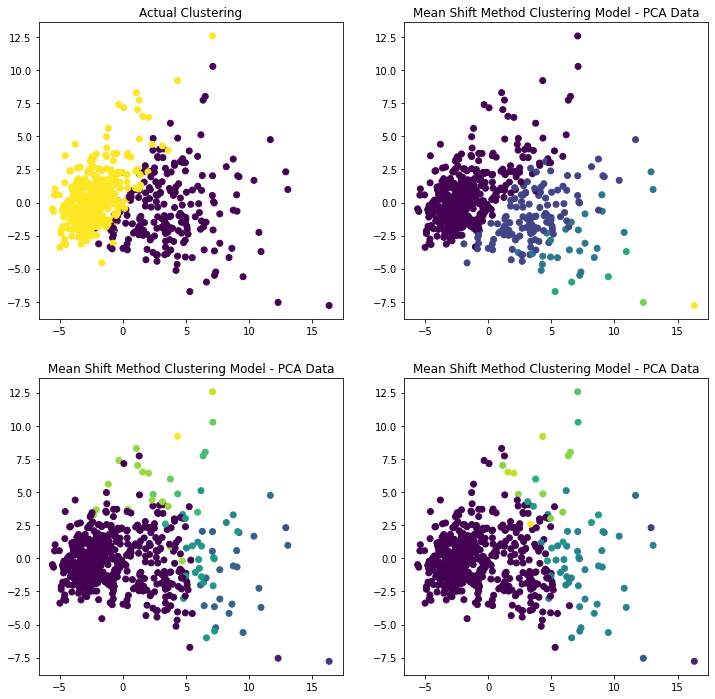

In [195]:
# Plotting the clusters to compare with the original dataset
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
# Actual Data
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')
# Original X Data
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=X_predict)
ax2.set_title('Mean Shift Method Clustering Model - PCA Data')
# X_scaled Data
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=Xs_predict)
ax3.set_title('Mean Shift Method Clustering Model - PCA Data')
# PCA Data
ax4.scatter(X_pca95[:,0],X_pca95[:,1],c=PCA_predict)
ax4.set_title('Mean Shift Method Clustering Model - PCA Data')
plt.show()

When looking at the plots of the mean shift method using our PCA data and comparing them with the actual clustering, we get similar results as before. There appear to be more distinct clusters with the original X data, but even so the model is unabalanced. There is variation between the mean areas in the different colors, but there are very few points that are distinctly in the second cluster.

In [196]:
from sklearn.cluster import MeanShift

# Mean shift method on Original X data
print('===============================================')
print('Mean Shift Clustering Method on Original X Data')
print('-----------------------------------------------')
score_finder(X_predict,X,y,k=X_n_clusters_)
print('===============================================')
# Mean shift method on X_scaled data
print('Mean Shift Clustering Method on X_Scaled Data')
print('-----------------------------------------------')
score_finder(Xs_predict,X_scaled,y,k=Xs_n_clusters_)
print('===============================================')
# Mean shift method on 95% PCA data
print('Mean Shift Clustering Method on 95% PCA Data')
print('-----------------------------------------------')
score_finder(PCA_predict,X_pca95,y,k=PCA_n_clusters_)
print('===============================================')

Mean Shift Clustering Method on Original X Data
-----------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 637.987
Davies-Bouldin Score: 0.512
Silhouette Score: 0.627
Adjusted Rand Score: 0.553
Homogeneity Score: 0.502
Completeness Score: 0.434
V-measure Score: 0.466
F1 Score: 0.034
Jaccard Score: 0.019
Fowlkes Mallows Score: 0.8
Adjusted Mutual Information Score: 0.499
Mean Shift Clustering Method on X_Scaled Data
-----------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 23.944
Davies-Bouldin Score: 1.17
Silhouette Score: 0.265
Adjusted Rand Score: 0.128
Homogeneity Score: 0.163
Completeness Score: 0.175
V-measure Score: 0.169
F1 Score: 0.031
Jaccard Score: 0.02
Fowlkes Mallows Score: 0.688
Adjusted Mutual Information Score: 0.156
Mean Shift Clustering Method on 95% PCA Data
-----------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 26.557
Davies-Bouldin Score: 0.936
Silhouette

When looking at the scoring metrics for the mean shift method, our model clearly performed better on the original dataset. This confirms what we saw in the visualizations. That being said, the scores were overall relatively low for this model.

## Comparing Methods
---



We want to determine which was the best clustering method. We will now make a plot that compares the clustering methods side by side


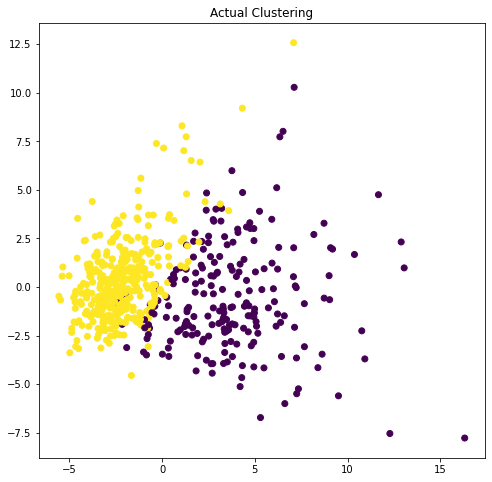

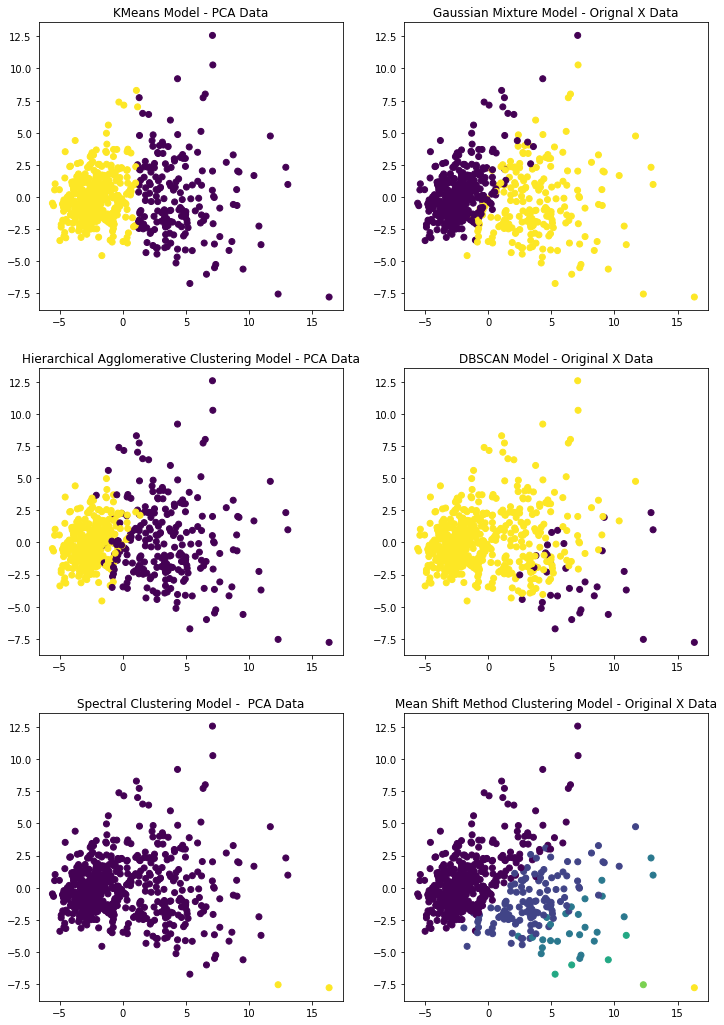

In [199]:
# Plotting the clusters to compare with the original dataset
fig1, (ax1) = plt.subplots(figsize=(8,8))
ax1.scatter(X_pca95[:,0],X_pca95[:,1],c=y)
ax1.set_title('Actual Clustering')
plt.show()

fig2, ((ax2,ax3),(ax4,ax5),(ax6,ax7)) = plt.subplots(3,2,figsize=(12,18))
# Plotting the K-means clusters
ax2.scatter(X_pca95[:,0],X_pca95[:,1],c=y_scaled_pca)
ax2.set_title('KMeans Model - PCA Data')

# Plotting the GMM clusters
ax3.scatter(X_pca95[:,0],X_pca95[:,1],c=X_GMM)
ax3.set_title('Gaussian Mixture Model - Orignal X Data')

# Plotting the Agglomerative Clustering Model clusters
ax4.scatter(X_pca95[:,0],X_pca95[:,1],c=agm_pca)
ax4.set_title('Hierarchical Agglomerative Clustering Model - PCA Data')

# Plotting the DBSCAN Clusters
ax5.scatter(X_pca95[:,0], X_pca95[:,1], c=X_labels)
ax5.set_title("DBSCAN Model - Original X Data")

# Plotting the Spectral Clustering Model Clusters
ax6.scatter(X_pca95[:,0],X_pca95[:,1],c=SC_pca)
ax6.set_title('Spectral Clustering Model -  PCA Data')

# Plotting the Mean Shift Method Clusters
ax7.scatter(X_pca95[:,0],X_pca95[:,1],c=X_predict)
ax7.set_title('Mean Shift Method Clustering Model - Original X Data')
plt.show()

Looking at the visual representations of our clustering models using the PCA Data, it appears that the K-means, Gaussian Mixture Model, and the Hierarchical Agglomerative Clustering Models are the closest to the actual clustering in the original dataset. We will now compare the scores and use those metrics to reccomend the best method.

We will also output the numeric score values for each method in one section for easier comparison.

In [198]:
# KMeans - PCA Dataset
print('============================================================')
print('K-Means on the 95% PCA Dataset')
print('------------------------------------------------------------')
score_finder(kmeans_X_2_pca,X_pca95,y,k=2)
print('============================================================')

# Gaussian Mixture Model - Original X Dataset
print('Gaussian Mixture Model on the Original X Dataset')
print('------------------------------------------------------------')
score_finder(X_GMM,X,y,k=2)
print('============================================================')

# Agglomerative Clustering - PCA Dataset
print('Agglomerative Clustering Model on the 95% PCA Dataset')
print('------------------------------------------------------------')
score_finder(agm_pca,X_pca95,y,k=2)
print('============================================================')

# DBSCAN - Original X Dataset
print('DBSCAN Model on the Original X Dataset')
print('------------------------------------------------------------')
print('Estimated number of clusters: %0.3f'% X_n_clusters_)
print('Estimated number of noise points: %0.3f'% X_n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, X_labels))
print("Completeness: %0.3f" % completeness_score(y, X_labels))
print("V-measure: %0.3f" % v_measure_score(y, X_labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, X_labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, X_labels))
print('============================================================')

# Spectral Clustering - PCA Dataset
print('Spectral Clustering on 95% PCA Data')
print('------------------------------------------------------------')
score_finder(SC_pca,X_pca95,y,k=2)
print('============================================================')

# Mean shift Method - Original X data
print('Mean Shift Clustering Method on Original X Data')
print('------------------------------------------------------------')
score_finder(X_predict,X,y,k=X_n_clusters_)
print('============================================================')


K-Means on the 95% PCA Dataset
------------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 288.125
Davies-Bouldin Score: 1.26
Silhouette Score: 0.358
Adjusted Rand Score: 0.671
Homogeneity Score: 0.544
Completeness Score: 0.565
V-measure Score: 0.555
F1 Score: 0.902
Jaccard Score: 0.822
Fowlkes Mallows Score: 0.85
Adjusted Mutual Information Score: 0.565
Gaussian Mixture Model on the Original X Dataset
------------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 675.566
Davies-Bouldin Score: 0.701
Silhouette Score: 0.532
Adjusted Rand Score: 0.812
Homogeneity Score: 0.703
Completeness Score: 0.709
V-measure Score: 0.706
F1 Score: 0.049
Jaccard Score: 0.025
Fowlkes Mallows Score: 0.912
Adjusted Mutual Information Score: 0.709
Agglomerative Clustering Model on the 95% PCA Dataset
------------------------------------------------------------
Number of clusters: 2
Calinski-Harabasz Score: 244.094


By analyzing the scores, the Hierarchical Agglomerative Clustering model scored the best in every external clustering model except for the completeness score, and since the only one to beat it out was the faulty DBSCAN clustering, we can safely ignore that result and say that the Hierarchical Agglomerative Clustering model had the best completeness score as well.  Based on these results and the graphical analysis, we can safely say that the Hierarchical Agglomerative Clustering model was the best clustering model for this dataset.

## Sources

[1] B. Burns. Iris Exploration (PCA, k-Means and GMM Clustering) [Online]. Available: https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering

[2] H. Wei. (2020, Jan. 2). How to measure clustering performances when there are no ground truth? [Online]. Available: https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c#:~:text=The%20Calinski%2DHarabasz%20index%20also,score%20%2C%20the%20better%20the%20performances.

[3] scikit learn. Sklearn.metrics.adjusted_rand_score [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

[4] scikit learn. Sklearn.mertrics.homogeneity_score [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

[5] scikit learn. Sklearn.mertrics.completeness_score [Online]. Available:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

[6] scikit learn. Sklearn.mertrics.v_measure_score [Online]. Available:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score  

[7] scikit learn. Sklearn.mertrics.adjusted_mutual_info_score [Online]. Available:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html

[8] scikit learn. Sklearn.mertrics.f1_score [Online]. Available:   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

[9] scikit learn. Sklearn.mertrics.jaccard_score [Online]. Available:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html 

[10] scikit learn. Sklearn.mertrics.fowlkes_mallows_score [Online]. Available:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html 

[11] S. Mishra. K means vs K means++[Online]. Available: https://iq.opengenus.org/k-means-vs-k-means-p/#:~:text=Both%20K%2Dmeans%20and%20K 

[12] T. Sarkar. (2019, Sep. 7). Clustering Metrics Better Than the Elbow Method [Online]. Available: https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6

[13] T. Sarkar. (2019, Sep. 6). Clustering Metrics – Alternatives to the Elbow Method [Online]. Available: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

[14] U. Malik. (2019, Jun. 24). Hierarchical Clustering with Python and Scikit-Learn [Online]. Available: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

[15] sci-kit learn. Plot Hierarchical Clustering Dendrogram [Online]. Available: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

[16] sci-kit learn. Demo of DBSCAN clustering algorithm [Online]. Available: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

[17] https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,by%20regions%20of%20lower%20density.&text=It%20can%20identify%20clusters%20in,density%20of%20the%20data%20points.

[18] sentdex. Mean Shift Intro – Practical Machine Learning Tutorial with Python p. 39 [Online]. Available: https://www.youtube.com/watch?v=3ERPpzrDkVg 

